# Introduction

Vietnam has a long history of devastating flooding, with nearly half of the naturual distaster events in Vietnam are floods, and 67% of the deaths in Vietnam caused by a naturual distaster are attributed to floods. With the advent of machine learning it is important for not only Vietnam, but all nations who are affected by flooding to work towards better prediction algorithims for flooding.

In this notebook we will explore different types of machine learning, their uses, and their effectiveness.

This notebook aims to both serve as a demo for the potential of machine learning usage in flood predictions as well as a guide for how to approach basic machine learning algorthims.

In [102]:
#The first step is to import any neccesary libraries that we will be using

#General Imports
#pandas is used to import data from data frame files i.e XML, CSV etc.
import pandas as pd
#numpy is used for mathematical functions
import numpy as np
#seaborn is for data visualization
import seaborn as sns
#For plotting graphs
import matplotlib.pyplot as plt
#"train_test_split" splits data into two parts, one is used for training the model, the other is used for testing the model
from sklearn.model_selection import train_test_split


#Regression Imports
#Import for linear and logistic regression
from sklearn import linear_model


#Neural Network Imports
#tensorflow is a library for machine learning, specifically neural networks
import tensorflow as tf

#keras is a library that makes using tensorflow easier
#Sequential is the most common/basic type of neural network
from keras.models import Sequential
#Dense is the most commonly used form of layer in neural networks
from keras.layers import Dense

# Data 
After importing libraries the next step is to import the data.

For this project there are two sets of data that will be used. The first is a dataset from a past flood prediction competiiton. The competition was about predicting flooding in Southern Malawi This is convenient to use because the competition knew what kinds of data would be needed to make a model and provided it, compared to normal data which is often incomplete or needs to be combined with other data.

The second dataset is a dataset of daily historical rainfall data in Vietnam from 2000-2018. 

# Challenges

Unlike the previous dataset the Vietnam data does not include data on when flooding occured. Therefore we can not make a machine learning model from this dataset. Instead, we will make a model from the Malawi dataset and make the assumption that Malawi and Vietnam have similar levels of flooding caused by rainfall.

In [103]:
#Importing the Malawi dataset
data = pd.read_csv('Train.csv')
data

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c389a-14ce-11ea-bce5-f49634744a41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,35.86,-15.44,0.0,635.675022,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5dfd-14ce-11ea-bce5-f49634744a41
16462,35.86,-15.43,0.0,632.598892,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5dfe-14ce-11ea-bce5-f49634744a41
16463,35.86,-15.42,0.0,632.450136,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5dff-14ce-11ea-bce5-f49634744a41
16464,35.86,-15.41,0.0,629.272733,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5e00-14ce-11ea-bce5-f49634744a41


In [104]:
#Importing the Vietnam Dataset
vietnam_data = pd.read_csv('VietnamWeeklyPrec.csv')
vietnam_data

,EN_name,Code,week1,week2,week3,week4,week5,week6,week7,week8,...,week981,week982,week983,week984,week985,week986,week987,week988,week989,week990
0,Binh Minh,1171503,0,0,0,0,0,0,0,0,...,38.271543,128.479100,0,15.390515,1.773028,29.313621,12.484736,60.099370,18.611313,0.519949
1,Kim Hai,1171549,0,0,0,0,0,0,0,0,...,33.620286,130.933344,0,15.043049,2.521573,28.918179,11.047029,55.680098,23.849065,0.517781
2,Van Hai,1171541,0,0,0,0,0,0,0,0,...,25.564189,149.304973,0,15.591714,0.237078,31.468409,18.719390,53.079236,29.046224,0.635593
3,Kim My,1171545,0,0,0,0,0,0,0,0,...,36.010386,134.041891,0,15.247301,2.437685,29.882411,13.057547,53.731623,27.420022,0.567094
4,Dinh Hoa,1171539,0,0,0,0,0,0,0,0,...,26.616195,146.376360,0,14.679794,0.000000,31.456525,20.185361,55.276965,26.208014,0.634720
5,Lai Thanh,1171537,0,0,0,0,0,0,0,0,...,33.937638,133.860346,0,13.873049,0.644221,29.378845,17.190960,40.526625,40.526625,0.591449
6,Yen Dong,1171127,0,0,0,0,0,0,0,0,...,27.592461,107.227580,0,8.051602,0.000000,28.650818,16.104634,54.878569,33.681860,0.662933
7,Yen Lam,1171131,0,0,0,0,0,0,0,0,...,38.813449,115.065227,0,11.040101,0.000000,28.988270,16.196575,46.101086,36.810673,0.618634
8,Yen Thai,1171129,0,0,0,0,0,0,0,0,...,34.647638,114.410403,0,10.494335,0.000000,29.167696,16.181249,47.346018,37.518571,0.639759
9,Dong Son,1170311,0,0,0,0,0,0,0,0,...,20.928009,118.234923,0,7.982426,0.000000,26.803259,15.418872,49.731046,39.142642,0.645798


# Cleaning Data

Before using the Malawi data we must first take out any unneccesary data. We will remove the columns "X", "Y", "LC_Type1_mode", and  "Square_ID" because we don't need them for our code. We are also going to remove "elevation" as we don't have that data for the Vietnam dataset

For the Vietnam data I already cleaned most of the it in a spreadhsheet software program, but left in the area name and code for convenience. This isn't required for the code so we should clean it as well, but we'll get to that after we have made the model.

In [105]:
data = data.drop(["X", "Y", "LC_Type1_mode","Square_ID","elevation"], axis = 1)
data

,target_2015,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,...,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19
0,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,...,18.264692,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,...,18.264692,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,...,18.264692,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,...,18.264692,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,...,18.264692,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,0.0,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,...,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072
16462,0.0,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,...,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072
16463,0.0,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,...,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072
16464,0.0,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,...,15.940852,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072


# Splitting the data
 The variable we are trying to predict is "target_xxxx" which describes the percentage of the specified area that was flooded over a certain period of time. In our data we are provided target_2015 and 17 weeks of rainfall data. We will use these 17 weeks to train our model and try and make predictions for target_2019 in 2019 Malawi as well as for 2018 Vietnam. For simplicity our model will just look at whether or not there was any flooding. So if target_2015> 0.0 we will count the area as "flooded"
 
 First we need to change all values in target_2015 into 1 and 0
 
 Second we need to split our train data into train and test sets.

In [106]:

#selecting the data from 2014/2015
train_data = data.loc[:, 'target_2015':'precip 2015-03-08 - 2015-03-15']
train_data

,target_2015,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15
0,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
1,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
2,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
3,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
4,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,0.0,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
16462,0.0,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
16463,0.0,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
16464,0.0,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683


In [107]:
#Defining inputs
X = data.loc[:, 'precip 2014-11-16 - 2014-11-23':'precip 2015-03-08 - 2015-03-15']
#Defining outputs
y = data[['target_2015']]


In [108]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.1)

X_train

,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15
9812,0.000000,0.000000,0.000000,2.417890,13.173078,12.524376,26.487107,22.358911,55.813704,0.475722,31.577622,22.262417,18.643876,5.120276,28.940343,14.664835,0.000000
6624,0.000000,0.000000,0.000000,10.887235,9.924515,7.701763,31.304699,19.829040,52.237933,0.502164,46.660279,37.116869,15.295461,3.205102,12.304032,5.636290,0.000000
4749,0.000000,0.000000,0.000000,10.887235,9.924515,7.701763,31.304699,19.829040,52.237933,0.502164,46.660279,37.116869,15.295461,3.205102,12.304032,5.636290,0.000000
3233,0.959006,0.000000,0.000000,18.013355,5.392385,12.249081,7.462999,47.088566,45.972601,0.000000,35.565913,34.880240,1.999615,0.878092,12.832311,4.840210,0.000000
8187,1.261848,0.697727,0.924689,7.968218,8.618390,4.269462,18.381539,23.908383,55.337064,0.474831,53.014243,26.276753,10.069213,3.612168,14.094538,7.455781,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,0.000000,0.000000,0.000000,17.083798,5.905440,13.760192,8.929560,43.898241,41.321017,0.000000,30.037450,23.830897,2.749005,4.411409,15.165961,5.538848,0.000000
10824,0.000000,0.000000,0.000000,5.790888,6.265551,6.616071,17.284049,20.401909,55.501115,0.000000,40.064331,20.829629,18.681926,6.936359,13.769957,10.698462,0.000000
16372,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,21.428131,2.493683
7468,0.838570,0.463680,0.614508,8.947382,9.056520,5.420804,22.716523,22.539996,54.297482,0.484000,50.882850,29.912994,11.822322,3.475621,13.493926,6.845446,0.000000


# Building the model
In some ways the creation of the actual model is relatively simple. Thanks to libraries like Keras and sklearn a few lines of code are all that you need to get started on a model.

# Linear Regression

The most basic form of Machine Learning is linear regression. Linear regression attempts to find a straight line that describes the relationship between the input and the output. There are two types of linear regression, simple and multiple. In simple we only use one variable as the input and in multiple we use more than one.

In [109]:
#Sum of the values in X to use for simple linear regression
data['sum_x'] = X.sum(axis = 1)

data

,target_2015,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,...,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,sum_x
0,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,...,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,252.559980
1,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,...,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,252.559980
2,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,...,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,252.559980
3,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,...,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,252.559980
4,0.0,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,...,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,252.559980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,0.0,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,...,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,330.154364
16462,0.0,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,...,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,330.154364
16463,0.0,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,...,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,330.154364
16464,0.0,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,15.765685,21.457507,105.275891,...,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,330.154364


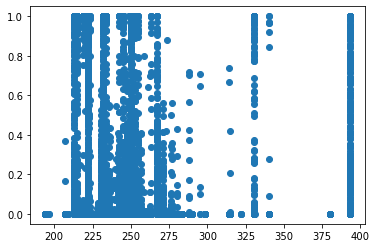

In [110]:
plt.plot(sum_x, y, 'o')

From this plot we can see that there doesn't seem to be a linear relationship between these two variables. However, we can try and make the linear regression model anyway to see if it works to some extent

In [111]:
linear_reg = linear_model.LinearRegression()

linear_reg.fit(data[['sum_x']],y)

LinearRegression()

In [112]:
linear_reg.score(data[['sum_x']],y)

0.003608465762637736

The score of our linear regression, R^2, is close to zero meaning that a simple linear regression is not suitable for our data. Next we'll try multiple linear regresssion

In [113]:
linear_reg.fit(X,y)

LinearRegression()

In [114]:
linear_reg.score(X,y)

0.13975590204139476

# Linear Regression Conclusion
Our score is much better this time but still not great so clearly linear regresion is not suitable for this dataset

# Logistic Regression
The next step up from Linear Regression is Logistic Regression. However, logistic regression can only be used for gaining binary outputs, either 1 or 0. As we are looking for a range of values between 0 to 1 from our output logistic regression is not suitable for our data.

# Neural Network

When regression isn't enough it is time to use a neural network. Nerual networks

In [115]:
#Define model type
sequential_model = Sequential()

#Layers of neurons which are how the model learns
sequential_model.add(Dense(17, input_shape=(17,), activation='relu'))
sequential_model.add(Dense(16, activation='relu'))

#Final decision
sequential_model.add(Dense(1, activation='sigmoid'))

#Compile
sequential_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

#This line is where the data is trained
sequential_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split = 0.1, shuffle = True)

Epoch 1/50
1334/1334 [==============================] - 1s 607us/step - loss: 0.0526 - accuracy: 0.8291 - val_loss: 0.0356 - val_accuracy: 0.8421
Epoch 2/50
1334/1334 [==============================] - 1s 559us/step - loss: 0.0494 - accuracy: 0.8284 - val_loss: 0.0352 - val_accuracy: 0.8428
Epoch 3/50
1334/1334 [==============================] - 1s 590us/step - loss: 0.0471 - accuracy: 0.8292 - val_loss: 0.0370 - val_accuracy: 0.8428
Epoch 4/50
1334/1334 [==============================] - 1s 577us/step - loss: 0.0466 - accuracy: 0.8286 - val_loss: 0.0363 - val_accuracy: 0.8408
Epoch 5/50
1334/1334 [==============================] - 1s 587us/step - loss: 0.0455 - accuracy: 0.8296 - val_loss: 0.0351 - val_accuracy: 0.8428
Epoch 6/50
1334/1334 [==============================] - 1s 561us/step - loss: 0.0451 - accuracy: 0.8296 - val_loss: 0.0344 - val_accuracy: 0.8428
Epoch 7/50
1334/1334 [==============================] - 1s 591us/step - loss: 0.0446 - accuracy: 0.8294 - val_loss: 0.0332 -

# Neural Network Results
   The results from the neural network model are much more promising than the ones from the regression models. The accuracy and validation accuracy (which is used to verify the actual accuracy) are both approximately 83% accurate.

# References
1. A preliminary analysis of flood and storm disaster data in Viet Nam, Oanh Luong Nhu, Nguyen Thi Thu Thuy, Ian Wilderspin, Miguel Coulier, 2011